In [1]:
# Notebook for isolating triggers and releases

# Load data
import numpy as np
import matplotlib.pyplot as plt

# Width of triggers 
width = 32
fileName = "second_collection"
output = fileName + "_triggs_rels" + f"_{width}.npz"

data = np.load((fileName+".npz"))

In [2]:
# Find signal triggers
def findTrigIdxs(signal, threshold=0.1):
    """
    Finds the indexes of the signal where the trigger happens
    """

    mask = signal <= threshold
    mask = mask[:, np.newaxis]
    zerosIdx = np.argwhere(mask)[:, 0].astype(int)
    jumpIdx = np.argwhere(np.diff(zerosIdx)>1)[:, 0].astype(int)
    trigIdx =  zerosIdx[jumpIdx].astype(int)
    releaseIdx = zerosIdx[jumpIdx+1].astype(int)
    return trigIdx, releaseIdx


def separateIntoTriggers(signal, trigIdx, releaseIdx, width=width):
    triggers = []
    releases = []
    for i, j in zip(trigIdx, releaseIdx):
        triggers.append(signal[i:i+width])
        releases.append(signal[j-width:j])
    return np.array(triggers), np.array(releases) 


def plotTriggers(triggers):
    plt.figure(figsize=(15,15))
    N = len(triggers)
    for i in range(N):
        if i+1 > int(np.sqrt(N))**2: continue    # Skip some signals to avoid error due to outside of grid
        plt.subplot(int(np.sqrt(N)), int(np.sqrt(N)), i+1)
        trig = triggers[i]
        plt.plot(range(len(trig)), trig, "b.")


def plotSignal(signal):
    plt.figure()
    plt.plot(range(len(signal)), signal, "b.")
    plt.show()

(10000,)


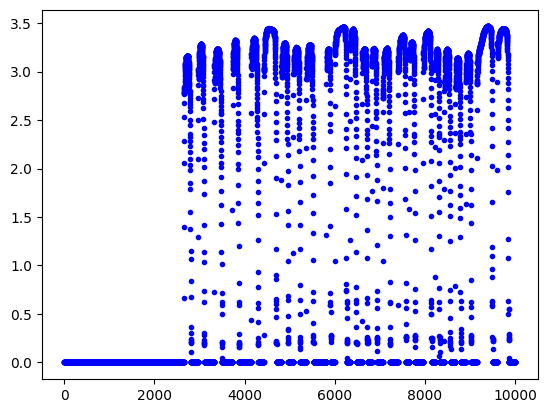

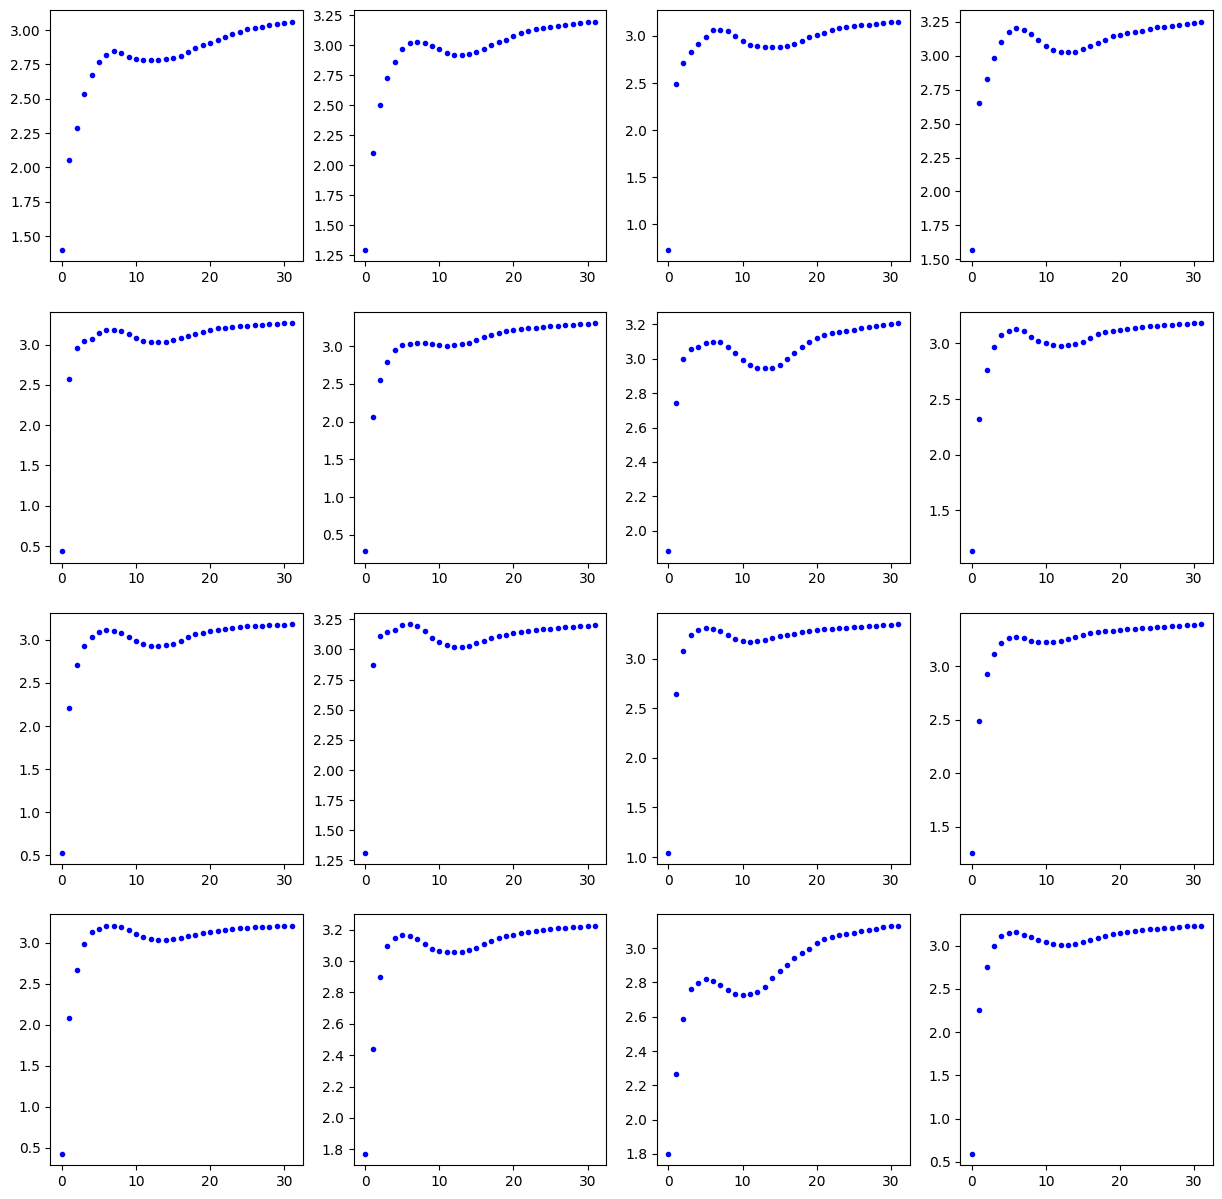

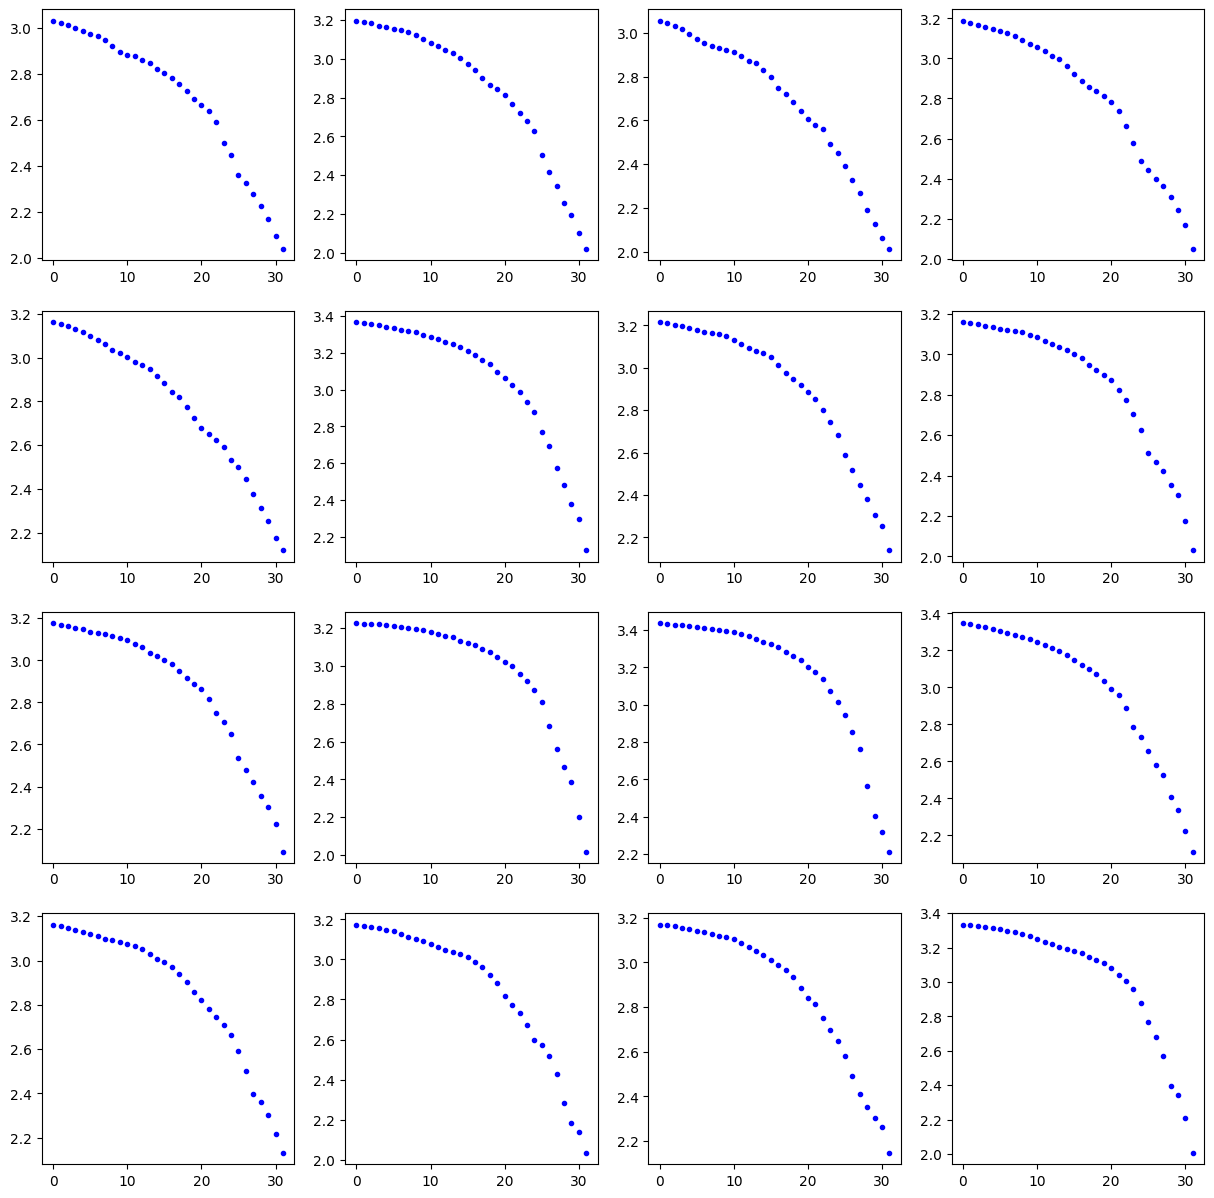

In [3]:
# Look at a few triggers
key = "A"
signal = data[key][:10000]   # Only a few presses 
print(signal.shape)
trigIdx, relIdx = findTrigIdxs(signal, threshold=1)
triggers, releases = separateIntoTriggers(signal, trigIdx, relIdx)
plotSignal(signal)
plotTriggers(triggers) 
plotTriggers(releases)

(10000,)


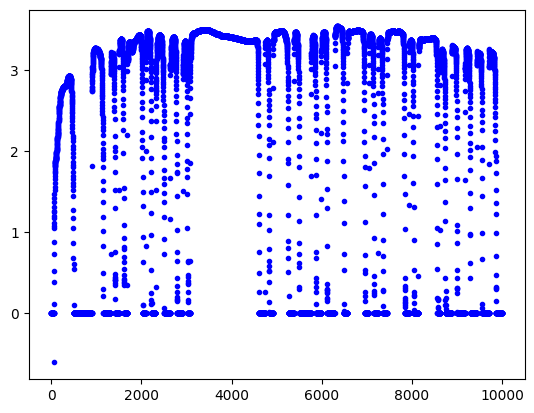

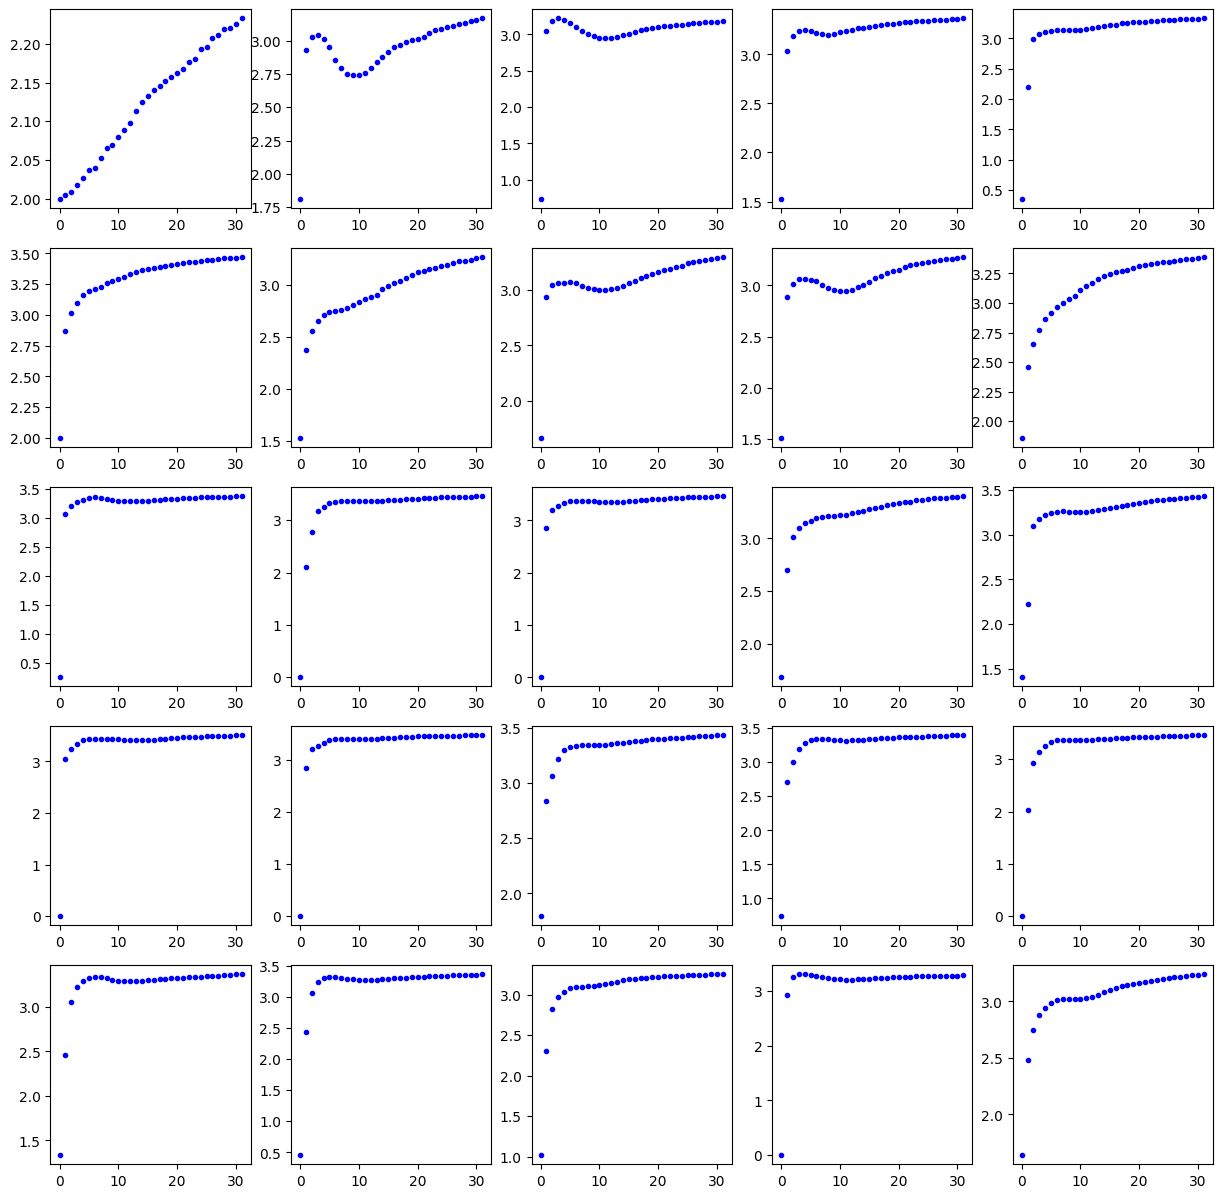

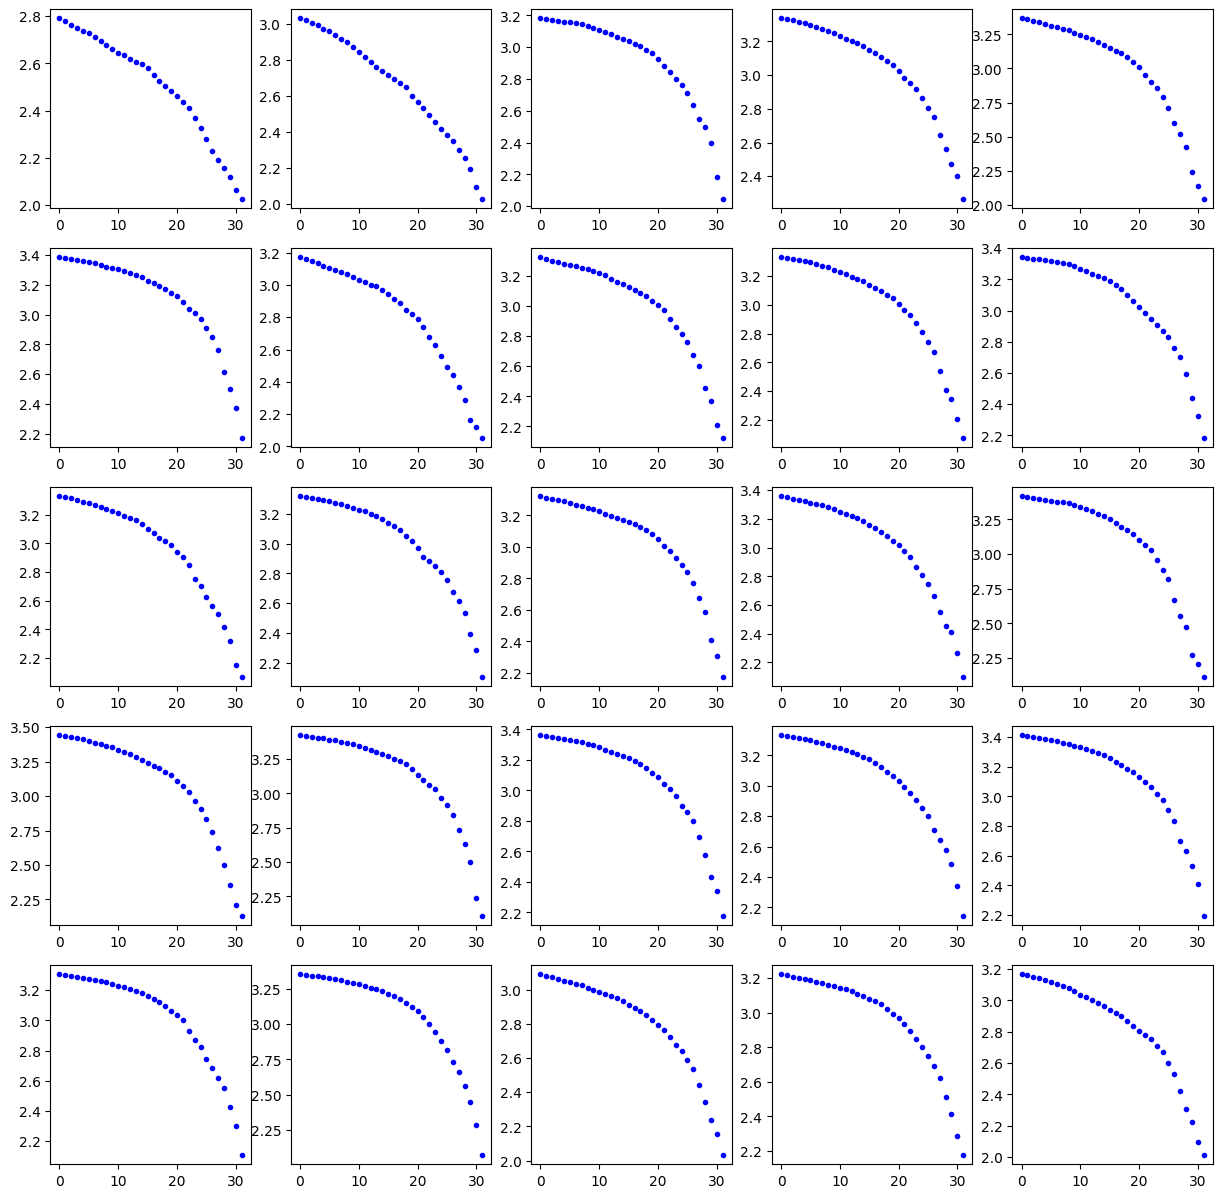

In [4]:
key = "J"
signal = data[key][:10000]
print(signal.shape)
trigIdx, relIdx = findTrigIdxs(signal, threshold=1)
triggers, releases = separateIntoTriggers(signal, trigIdx, relIdx)
plotSignal(signal)
plotTriggers(triggers) 
plotTriggers(releases)

In [6]:
# Filter data into triggers and save it
filteredData = {}
for key in data:
    signal = data[key].flatten()
    trigIdx, relIdx = findTrigIdxs(signal, threshold=2)
    triggers, releases = separateIntoTriggers(signal, trigIdx, relIdx)
    filteredData[key+"_triggers"] = triggers
    filteredData[key+"_releases"] = releases 
    print("saving trigers: ", triggers.shape)
    print("saving releases: ", releases.shape)

np.savez(output, **filteredData)

saving trigers:  (2260, 32)
saving releases:  (2260, 32)
saving trigers:  (3080, 32)
saving releases:  (3080, 32)
saving trigers:  (2551, 32)
saving releases:  (2551, 32)
